# Desafio 2 - Parte Individual

**Perguntas (Obrigatório):**

1) Pense na Hipótese de 2 universidades A e B onde X é a média de notas delas e elas tem exatamente os mesmos cursos. É possível que A_X > B_X e TODOS os cursos de B sejam melhores (notas maiores) que os de A? Explique (não são necessários códigos, apenas a explicação). Dica: paradoxo de simpson.

2) Rode uma regressão multipla que use, entre outras, a carga horária de um curso como variavel independente para explicar a idade dos alunos formados.

3) Qual a probabilidade de pegarmos um professor ao acaso no Brasil e ele ter mais do que o dobro da sua idade dado que ele é homem.

Obs: Não usar informações que não estejam na pasta Desafios nas partes Obrigatórias

## Resposta 1

Sim, é possível que a média 'A_X' de notas da Universidade A seja maior que a média 'B_X' de notas da Universidade B, mesmo que TODOS os cursos da Universidade B tenham notas maiores que os cursos da Universidade A.

Isso pode ocorrer como explicado no Paradoxo de Simpson.

Ref. Simpson’s Paradox: How to Prove Opposite Arguments with the Same Data

https://towardsdatascience.com/simpsons-paradox-how-to-prove-two-opposite-arguments-using-one-dataset-1c9c917f5ff9

Explicação:

Uma possível explicação seria o fato de que não está sendo levado em consideração algum dado, como por exemplo o tamanho de cada amostra, e como foi feito o processo de classificação das universidades e dos cursos, em resumo, como estas notas foram determinadas.

Para efeito de um exemplo, podemos considerar que as notas dos cursos e das Universidades vêm dos próprios alunos. Assim aqueles que tiveram um bom curso deram boas notas tanto para o curso que realizaram como para a Universidade. E o mesmo ocorreria em caso contrário.

Assim, baseado nesta afirmação, poderíamos exemplificar com alguns números.

Hipóteses:

- Universidade A e Universiade B tem os mesmos cursos F e G
- Universidade A -> curso F com 800 alunos / curso G com 3200 alunos (Total de alunos Universidade A = 4.000)
- Universidade B -> curso F com 300 alunos / curso G com 100 alunos (Total de alunos Universidade B = 400)
- Média de notas para Universidade A -> A_X
- Média de notas para Universidade B -> B_X
- Média de notas para o curso F na Universidade A -> F_A_X
- Média de notas para o curso G na Universidade A -> G_A_X
- Média de notas para o curso F na Universidade B -> F_B_X
- Média de notas para o curso G na Universidade B -> G_B_X

Definições do problema:

- TODOS os cursos da Universidade B tem notas maiores que os cursos da Universidade A (F_B_X > F_A_X e G_B_X > G_A_X).
- Provar que é possível que a nota da Universidade A pode ser maior que a nota da Universidade B (A_X > B_X).

Solução:

Assumindo como exemplo:

- F_B_X = 7 > F_A_X = 6
- G_B_X = 9.5 > G_A_X = 9

Cálculo da média de nota por Universidade:

- A_X = ( (800 alunos x nota do curso F) + (3200 alunos x nota do curso G) ) / 4000 alunos
- A_X = ((800 x 6) + (3200 x 9)) / 4000 = (4800 + 28800) / 4000 = 33600 / 4000 = 8.4


- B_X = ( (300 alunos x nota do curso F) + (100 alunos x nota do curso G) ) / 400 alunos
- B_X = ((300 x 7) + (100 x 9.5)) / 400 = (2100 + 950) / 400 = 3050 / 400 = 7.625

Portanto, para este caso, a média 'A_X' de notas da Universidade A de 8.4 é MAIOR do que a média 'B_X' de notas da Universidade B de 7.625, mesmo que individualmente as notas dos mesmos cursos na Universidade B são maiores do que as de A.

## Resposta 2

Regressão multipla usando, entre outras, a carga horária de um curso como variável independente para explicar a idade dos alunos formados.

In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
desktop = os.path.join(os.path.expanduser("~"), "Desktop")
filePath_db = os.path.join(desktop, "Microdados_Educacao_Superior_2017\DADOS\Desafio_2A.db")

db = sqlite3.connect(filePath_db)

In [3]:
# CO_IES - Código único de identificação da IES
# CO_CURSO - Código único de identificação do curso
# NO_CURSO - Nome do curso
# NU_CARGA_HORARIA - Carga horária mínima do curso
#
# IN_MATUTINO - Informa se o curso presencial funciona no turno matutino
# IN_VESPERTINO - Informa se o curso presencial funciona no turno vespertino
# IN_NOTURNO - Informa se o curso presencial funciona no turno noturno
# "0. Não / 1. Sim / (.) Não aplicável (Curso a distância)"
#
# TP_MODALIDADE_ENSINO - Código da modalidade de ensino do curso
# "1. Presencial / 2. Curso a distância"

CURSOS = ('''select
             CO_IES,
             CO_CURSO,
             NO_CURSO,
             NU_CARGA_HORARIA,
             IN_MATUTINO,
             IN_VESPERTINO,
             IN_NOTURNO,
             TP_MODALIDADE_ENSINO
             from DM_CURSO''')

In [4]:
df_cursos = pd.read_sql_query(CURSOS,db)
df_cursos.shape

(35693, 8)

In [5]:
df_cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35693 entries, 0 to 35692
Data columns (total 8 columns):
CO_IES                  35693 non-null int64
CO_CURSO                35693 non-null int64
NO_CURSO                35693 non-null object
NU_CARGA_HORARIA        35693 non-null int64
IN_MATUTINO             33581 non-null float64
IN_VESPERTINO           33581 non-null float64
IN_NOTURNO              33581 non-null float64
TP_MODALIDADE_ENSINO    35693 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.2+ MB


In [6]:
df_cursos.head()

,CO_IES,CO_CURSO,NO_CURSO,NU_CARGA_HORARIA,IN_MATUTINO,IN_VESPERTINO,IN_NOTURNO,TP_MODALIDADE_ENSINO
0,789,1259131,MÚSICA,3210,0.0,0.0,1.0,1
1,4567,1258115,GESTÃO DE RECURSOS HUMANOS,1720,0.0,0.0,1.0,1
2,2341,68433,DIREITO,4080,1.0,0.0,1.0,1
3,670,52052,ENGENHARIA ELÉTRICA,3892,0.0,0.0,1.0,1
4,403,18061,DIREITO,3790,1.0,0.0,1.0,1


In [7]:
# CO_IES - Código único de identificação da IES
# CO_CURSO - Código único de identificação do curso
# NU_ANO_NASCIMENTO - Ano de nascimento do aluno
# NU_MES_NASCIMENTO - Mês de nascimento do aluno
# NU_DIA_NASCIMENTO - Dia de nascimento do aluno
# NU_IDADE - Idade que o aluno completa no ano de referência do Censo
# TP_SITUACAO - Código do tipo de situação de vínculo do aluno no curso
#  2. Cursando
#  3. Matrícula trancada
#  4. Desvinculado do curso
#  5. Transferido para outro curso da mesma IES
#  6. Formado
#  7. Falecido

ALUNOS = ('''select
             CO_IES,
             CO_CURSO,
             NU_ANO_NASCIMENTO,
             NU_MES_NASCIMENTO,
             NU_DIA_NASCIMENTO,
             NU_IDADE
             from DM_ALUNO
             where TP_SITUACAO = 6''')

In [8]:
df_alunos = pd.read_sql_query(ALUNOS,db)
df_alunos.shape

(1201145, 6)

In [9]:
df_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201145 entries, 0 to 1201144
Data columns (total 6 columns):
CO_IES               1201145 non-null int64
CO_CURSO             1201145 non-null int64
NU_ANO_NASCIMENTO    1201145 non-null int64
NU_MES_NASCIMENTO    1201145 non-null int64
NU_DIA_NASCIMENTO    1201145 non-null int64
NU_IDADE             1201145 non-null int64
dtypes: int64(6)
memory usage: 55.0 MB


In [10]:
df_alunos.head()

,CO_IES,CO_CURSO,NU_ANO_NASCIMENTO,NU_MES_NASCIMENTO,NU_DIA_NASCIMENTO,NU_IDADE
0,1,1,1978,4,3,39
1,1,1,1987,7,7,30
2,1,1,1980,10,26,37
3,1,1,1975,2,10,42
4,1,1,1978,9,20,39


In [11]:
df_alunos1 = df_alunos.merge(df_cursos, how='left', on=['CO_IES', 'CO_CURSO'])

In [12]:
df_alunos1.shape

(1201145, 12)

In [13]:
df_alunos1.head()

,CO_IES,CO_CURSO,NU_ANO_NASCIMENTO,NU_MES_NASCIMENTO,NU_DIA_NASCIMENTO,NU_IDADE,NO_CURSO,NU_CARGA_HORARIA,IN_MATUTINO,IN_VESPERTINO,IN_NOTURNO,TP_MODALIDADE_ENSINO
0,1,1,1978,4,3,39,DIREITO,3700,1.0,0.0,1.0,1
1,1,1,1987,7,7,30,DIREITO,3700,1.0,0.0,1.0,1
2,1,1,1980,10,26,37,DIREITO,3700,1.0,0.0,1.0,1
3,1,1,1975,2,10,42,DIREITO,3700,1.0,0.0,1.0,1
4,1,1,1978,9,20,39,DIREITO,3700,1.0,0.0,1.0,1


In [14]:
df_alunos1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201145 entries, 0 to 1201144
Data columns (total 12 columns):
CO_IES                  1201145 non-null int64
CO_CURSO                1201145 non-null int64
NU_ANO_NASCIMENTO       1201145 non-null int64
NU_MES_NASCIMENTO       1201145 non-null int64
NU_DIA_NASCIMENTO       1201145 non-null int64
NU_IDADE                1201145 non-null int64
NO_CURSO                1201145 non-null object
NU_CARGA_HORARIA        1201145 non-null int64
IN_MATUTINO             948410 non-null float64
IN_VESPERTINO           948410 non-null float64
IN_NOTURNO              948410 non-null float64
TP_MODALIDADE_ENSINO    1201145 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 119.1+ MB


In [15]:
df_alunos1.corr()

,CO_IES,CO_CURSO,NU_ANO_NASCIMENTO,NU_MES_NASCIMENTO,NU_DIA_NASCIMENTO,NU_IDADE,NU_CARGA_HORARIA,IN_MATUTINO,IN_VESPERTINO,IN_NOTURNO,TP_MODALIDADE_ENSINO
CO_IES,1.000000,0.172216,-0.002118,0.001510,0.000611,0.002118,-0.020068,-0.045771,0.008133,0.072198,-0.154424
CO_CURSO,0.172216,1.000000,-0.050537,0.001819,-0.000292,0.050537,-0.102816,-0.017070,-0.014310,0.021316,0.076425
NU_ANO_NASCIMENTO,-0.002118,-0.050537,1.000000,-0.037686,0.001275,-1.000000,0.111674,-0.071317,-0.029559,-0.120310,-0.331934
NU_MES_NASCIMENTO,0.001510,0.001819,-0.037686,1.000000,0.007670,0.037686,-0.000441,0.000345,0.002309,-0.002330,0.002683
NU_DIA_NASCIMENTO,0.000611,-0.000292,0.001275,0.007670,1.000000,-0.001275,0.000766,-0.001074,-0.002037,-0.001490,-0.000807
NU_IDADE,0.002118,0.050537,-1.000000,0.037686,-0.001275,1.000000,-0.111674,0.071317,0.029559,0.120310,0.331934
NU_CARGA_HORARIA,-0.020068,-0.102816,0.111674,-0.000441,0.000766,-0.111674,1.000000,-0.065832,0.013582,-0.333607,-0.288820
IN_MATUTINO,-0.045771,-0.017070,-0.071317,0.000345,-0.001074,0.071317,-0.065832,1.000000,0.059018,0.274472,NaN
IN_VESPERTINO,0.008133,-0.014310,-0.029559,0.002309,-0.002037,0.029559,0.013582,0.059018,1.000000,-0.007565,NaN
IN_NOTURNO,0.072198,0.021316,-0.120310,-0.002330,-0.001490,0.120310,-0.333607,0.274472,-0.007565,1.000000,NaN


De acordo com o resultado da correlação acima, as variáveis que mais parecem explicar a Idade do Aluno formado são:

- TP_MODALIDADE_ENSINO -> 0.33
- NU_CARGA_HORARIA -> -0.11 (valor negativo)
- IN_NOTURNO -> 0.12
- IN_MATUTINO -> 0.07
- IN_VESPERTINO -> 0.03

In [16]:
df_alunos2 = df_alunos1.drop(columns = ['CO_IES', 
                                        'CO_CURSO',
                                        'NO_CURSO',
                                        'NU_ANO_NASCIMENTO',
                                        'NU_MES_NASCIMENTO',
                                        'NU_DIA_NASCIMENTO',])

In [17]:
df_alunos2.shape

(1201145, 6)

In [18]:
df_alunos2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201145 entries, 0 to 1201144
Data columns (total 6 columns):
NU_IDADE                1201145 non-null int64
NU_CARGA_HORARIA        1201145 non-null int64
IN_MATUTINO             948410 non-null float64
IN_VESPERTINO           948410 non-null float64
IN_NOTURNO              948410 non-null float64
TP_MODALIDADE_ENSINO    1201145 non-null int64
dtypes: float64(3), int64(3)
memory usage: 64.1 MB


In [19]:
df_alunos2.head()

,NU_IDADE,NU_CARGA_HORARIA,IN_MATUTINO,IN_VESPERTINO,IN_NOTURNO,TP_MODALIDADE_ENSINO
0,39,3700,1.0,0.0,1.0,1
1,30,3700,1.0,0.0,1.0,1
2,37,3700,1.0,0.0,1.0,1
3,42,3700,1.0,0.0,1.0,1
4,39,3700,1.0,0.0,1.0,1


In [20]:
df_alunos2.corr()

,NU_IDADE,NU_CARGA_HORARIA,IN_MATUTINO,IN_VESPERTINO,IN_NOTURNO,TP_MODALIDADE_ENSINO
NU_IDADE,1.000000,-0.111674,0.071317,0.029559,0.120310,0.331934
NU_CARGA_HORARIA,-0.111674,1.000000,-0.065832,0.013582,-0.333607,-0.288820
IN_MATUTINO,0.071317,-0.065832,1.000000,0.059018,0.274472,NaN
IN_VESPERTINO,0.029559,0.013582,0.059018,1.000000,-0.007565,NaN
IN_NOTURNO,0.120310,-0.333607,0.274472,-0.007565,1.000000,NaN
TP_MODALIDADE_ENSINO,0.331934,-0.288820,NaN,NaN,NaN,1.000000


In [21]:
# TP_MODALIDADE_ENSINO - Código da modalidade de ensino do curso
# "1. Presencial / 2. Curso a distância"
#
# 948410 - Curso presencial (pode ser IN_MATUTINO e/ou IN_VESPERTINO e/ou IN_NOTURNO)
# 252735 - Curso a distância

df_alunos2['TP_MODALIDADE_ENSINO'].value_counts(dropna=False)

1    948410
2    252735
Name: TP_MODALIDADE_ENSINO, dtype: int64

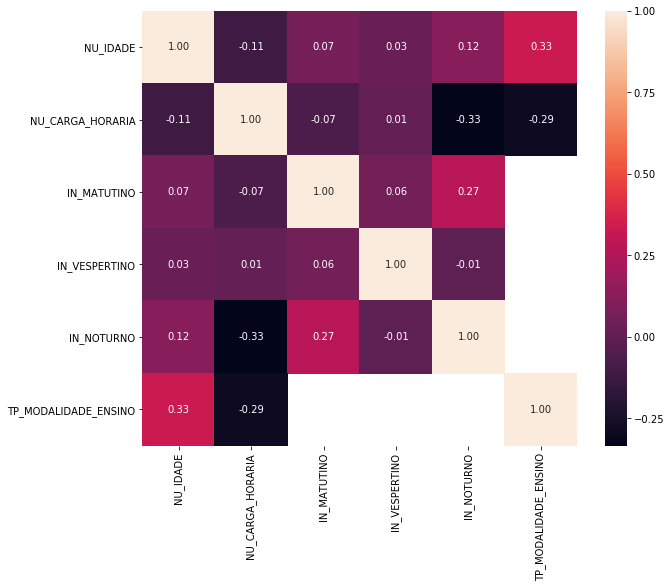

In [22]:
# Rodando um gráfico heatmap mostrando apenas 5 variáveis que mais se correlacionam com a Idade

corr = df_alunos2.corr()

f, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=corr.columns,
                 xticklabels=corr.columns)

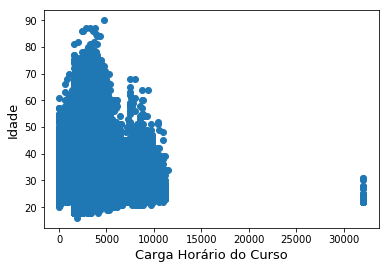

In [23]:
# Plotando um gráfico de dispersão

fig, ax = plt.subplots()
ax.scatter(y = df_alunos2['NU_IDADE'], x = df_alunos2['NU_CARGA_HORARIA'])
plt.ylabel('Idade', fontsize=13)
plt.xlabel('Carga Horário do Curso', fontsize=13)
plt.show()

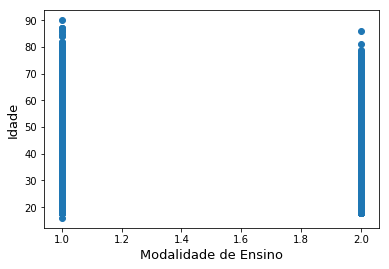

In [24]:
# Plotando um gráfico de dispersão
# "1. Presencial / 2. Curso a distância"

fig, ax = plt.subplots()
ax.scatter(y = df_alunos2['NU_IDADE'], x = df_alunos2['TP_MODALIDADE_ENSINO'])
plt.ylabel('Idade', fontsize=13)
plt.xlabel('Modalidade de Ensino', fontsize=13)
plt.show()

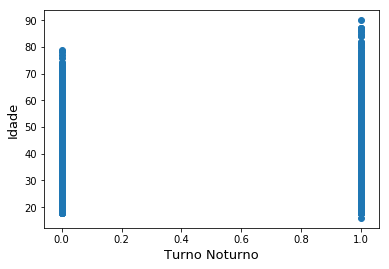

In [25]:
# Plotando um gráfico de dispersão
# IN_NOTURNO - Informa se o curso presencial funciona no turno noturno
# "0. Não / 1. Sim / (.) Não aplicável (Curso a distância)"

fig, ax = plt.subplots()
ax.scatter(y = df_alunos2['NU_IDADE'], x = df_alunos2['IN_NOTURNO'])
plt.ylabel('Idade', fontsize=13)
plt.xlabel('Turno Noturno', fontsize=13)
plt.show()

In [26]:
# Plotando o PAIRPLOT para todas as variáveis 
# sns.pairplot(df_alunos2)

In [27]:
list(df_alunos2)

['NU_IDADE',
 'NU_CARGA_HORARIA',
 'IN_MATUTINO',
 'IN_VESPERTINO',
 'IN_NOTURNO',
 'TP_MODALIDADE_ENSINO']

In [28]:
# Criando novo DataFrame apenas com carga horária e modalidade de ensino para tentar explicar a Idade
df_alunos3 = df_alunos2.drop(columns = ['IN_MATUTINO', 'IN_VESPERTINO', 'IN_NOTURNO'])
df_alunos3.head()

,NU_IDADE,NU_CARGA_HORARIA,TP_MODALIDADE_ENSINO
0,39,3700,1
1,30,3700,1
2,37,3700,1
3,42,3700,1
4,39,3700,1


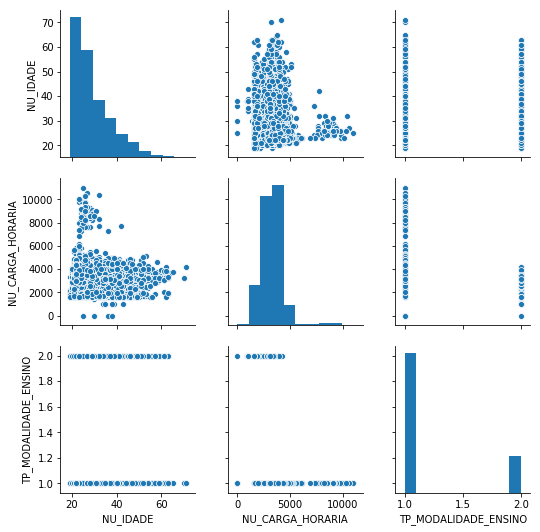

In [29]:
sns.pairplot(df_alunos3.sample(5000))

In [30]:
df_alunos3.corr()

,NU_IDADE,NU_CARGA_HORARIA,TP_MODALIDADE_ENSINO
NU_IDADE,1.000000,-0.111674,0.331934
NU_CARGA_HORARIA,-0.111674,1.000000,-0.288820
TP_MODALIDADE_ENSINO,0.331934,-0.288820,1.000000


In [31]:
# Ajustando Idade com log
df_alunos3['log_idade'] = np.log1p(df_alunos3['NU_IDADE'])

In [32]:
df_alunos3.head()

,NU_IDADE,NU_CARGA_HORARIA,TP_MODALIDADE_ENSINO,log_idade
0,39,3700,1,3.688879
1,30,3700,1,3.433987
2,37,3700,1,3.637586
3,42,3700,1,3.761200
4,39,3700,1,3.688879


In [33]:
# Rodando uma Regressão Multipla usando, entre outras, a carga horária de um curso como variável independente
# para explicar a idade dos alunos formados (NU_IDADE -> TARGET)

model = smf.ols('log_idade ~ NU_CARGA_HORARIA + TP_MODALIDADE_ENSINO', df_alunos3.dropna()).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_idade   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                 7.951e+04
Date:                Tue, 03 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:18:12   Log-Likelihood:                 73152.
No. Observations:             1201145   AIC:                        -1.463e+05
Df Residuals:                 1201142   BIC:                        -1.463e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.1459 

## Resposta 3

Probabilidade de:

- pegarmos um professor ao acaso no Brasil
- ele ter mais do que o dobro da sua idade
- dado que ele é homem

In [52]:
# Analisando os dados de DM_DOCENTE
#
# TP_SITUACAO:
# "1. Em exercício / 2. Afastado para qualificação / 3. Afastado para exercício em outros órgãos/entidades
#  4. Afastado por outros motivos / 5. Afastado para tratamento de saúde / 6. Falecido"
# TP_SEXO:
# "1. Feminino / 2. Masculino"
#
# Nota: considerando apenas professores homens em exercício (TP_SITUACAO = 1 e TP_SEXO = 2)

DOCENTES = ('''select
               TP_SEXO,
               NU_IDADE
               from DM_DOCENTE
               where TP_SITUACAO = 1 and TP_SEXO = 2''')

In [53]:
df_docentes = pd.read_sql_query(DOCENTES,db)
df_docentes.shape

(206255, 2)

In [54]:
df_docentes.describe()

,TP_SEXO,NU_IDADE
count,206255.0,206255.000000
mean,2.0,45.306179
std,0.0,11.242007
min,2.0,19.000000
25%,2.0,36.000000
50%,2.0,44.000000
75%,2.0,53.000000
max,2.0,99.000000


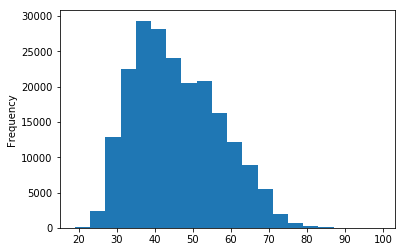

In [61]:
df_docentes.NU_IDADE.plot.hist(bins=20)

In [64]:
# Ajustando Idade com log
df_docentes['log_idade'] = np.log1p(df_docentes['NU_IDADE'])

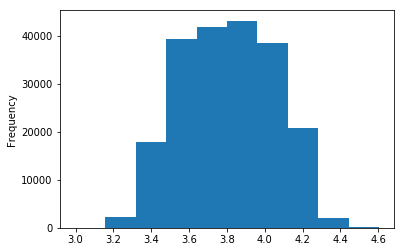

In [66]:
df_docentes.log_idade.plot.hist()

In [68]:
minha_idade = 45
minha_log_idade = np.log1p(minha_idade)

n_docentes = len(df_docentes['log_idade'])
media_docentes = df_docentes['log_idade'].mean()
sigma_docentes = df_docentes['log_idade'].std()

print(minha_idade, minha_log_idade, n_docentes, media_docentes, sigma_docentes)

45 3.828641396489095 206255 3.80599415634635 0.24248921848922075


In [69]:
# Realizando Z-test
# Calculando o Intervalo de Confiança de 95% 
print(media_docentes - 1.96*sigma_docentes, media_docentes + 1.96*sigma_docentes)

3.3307152881074775 4.281273024585223


In [71]:
# Cálculo da probabilidade do docente homem ter mais do que o dobro de minha idade
# -> prob de ser maior do que minha_idade * 2

minha_idade_dobrada = minha_idade * 2
minha_idade_dobrada_log = np.log1p(minha_idade_dobrada)

minha_idade_dobrada_log

# Note que o resultado está além do intervalo de confiança de 95%
# portanto a probabilidade será 1 - p-value do ponto onde estiver localizado a minha_idade_dobrada_log de 4.51

4.51085950651685

In [73]:
z_score_minha_idade_dobrada = (minha_idade_dobrada_log - media_docentes) / sigma_docentes
z_score_minha_idade_dobrada

2.906790473250804

In [74]:
# Calculando com scipy
print(stats.norm.interval(alpha=0.95, loc=media_docentes, scale=sigma_docentes))
print(stats.z-score(z_score_minha_idade_dobrada,))

(3.3307240214682134, 4.281264291224487)


In [75]:
print(stats.norm.interval(alpha=0.96, loc=media_docentes, scale=sigma_docentes)[1])
print(stats.norm.interval(alpha=0.97, loc=media_docentes, scale=sigma_docentes)[1])
print(stats.norm.interval(alpha=0.98, loc=media_docentes, scale=sigma_docentes)[1])
print(stats.norm.interval(alpha=0.99, loc=media_docentes, scale=sigma_docentes)[1])

4.3040061246585495
4.332217676057808
4.370108434256574
4.4306049911255565


In [103]:
# Achando o valor próximo de z-score de minha_idade_dobrada_log = 4.51085950651685

print(stats.norm.interval(alpha=0.9963482, loc=media_docentes, scale=sigma_docentes)[1])
(1-0.9963482) / 2

4.510854873288285


0.0018258999999999914

**Conclusão, a probabilidade será de menos de 0.2% de encontrar um docente homem acima do dobro de minha idade de 45 anos**